In [1]:
# import Data Manipulation Libraries
import numpy as np
import pandas as pd
# import data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# import Filter Warning Libraries
import warnings
warnings.filterwarnings("ignore")

# import Logging Files
import logging
logging.basicConfig(level = logging.INFO,
                    filename= "model.log",
                    filemode= "w",
                    format= "%(asctime)s - %(levelname)s - %(message)s",
                    force= True)
# import Stats Scipy Library
import scipy.stats as stats

In [2]:
# data Import Using Pandas Function

url = "https://raw.githubusercontent.com/Digraskarpratik/BankMarketing_MLModel/refs/heads/main/BankTelemarketing.csv"

df = pd.read_csv(url, sep= ";")

df.sample(frac=1) # shuffle Dataset
# print (df.sample(frac=1))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31541,45,management,married,primary,no,4629,no,no,telephone,2,apr,285,2,-1,0,unknown,no
27928,46,management,single,tertiary,no,625,no,no,cellular,28,jan,107,1,163,5,other,no
28912,36,admin.,single,secondary,no,115,no,no,cellular,2,feb,225,1,-1,0,unknown,no
16061,28,blue-collar,married,primary,no,413,yes,no,cellular,22,jul,443,1,-1,0,unknown,no
41580,31,student,single,tertiary,no,64,no,no,cellular,15,sep,208,1,105,2,success,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30832,46,self-employed,married,tertiary,no,291,no,no,cellular,9,feb,105,4,-1,0,unknown,no
25020,34,admin.,married,secondary,no,45,yes,no,cellular,18,nov,79,1,-1,0,unknown,no
12747,47,unknown,divorced,primary,no,0,no,no,cellular,7,jul,240,1,-1,0,unknown,no
1622,32,blue-collar,married,secondary,no,536,yes,no,unknown,9,may,208,2,-1,0,unknown,no


In [3]:
# Checking Data Shape and Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
logging.info("Dataset Uploaded Successfully.......")


In [5]:
logging.info("Staring the work........!")

In [6]:
# split the Dataset into Numerical_Data and Categorical_Data

Numerical_Data = df.select_dtypes(exclude = "object")

Categorical_Data = df.select_dtypes(include= "object")

In [7]:
#Checking the Numerical_Data
Numerical_Data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [8]:
# Categorical_Data
Categorical_Data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [9]:
# Checking Descriptive Stats :- Numerical_Data and Categorical_Data

from collections import OrderedDict

stats = []

for i in Numerical_Data:
    
    Numerical_Stats = OrderedDict({
        "Feature" : i,
        "Maximum" : Numerical_Data[i].max(),
        "Minimum" : Numerical_Data[i].min(),
        "25" : Numerical_Data[i].quantile(0.25),
        "Mean" : Numerical_Data [i].mean(),
        "Median" : Numerical_Data[i].median(),
        "75" : Numerical_Data [i].quantile(0.75),
        "Kurtosis" : Numerical_Data [i].kurt(),
        "Skewness" : Numerical_Data [i].skew(),
        "Standard" : Numerical_Data [i].std()
        
    })
    
    stats.append(Numerical_Stats)
    
    report = pd.DataFrame(stats)
    
report

,Feature,Maximum,Minimum,25,Mean,Median,75,Kurtosis,Skewness,Standard
0,age,95,18,33.0,40.936210,39.0,48.0,0.319570,0.684818,10.618762
1,balance,102127,-8019,72.0,1362.272058,448.0,1428.0,140.751547,8.360308,3044.765829
2,day,31,1,8.0,15.806419,16.0,21.0,-1.059897,0.093079,8.322476
3,duration,4918,0,103.0,258.163080,180.0,319.0,18.153915,3.144318,257.527812
4,campaign,63,1,1.0,2.763841,2.0,3.0,39.249651,4.898650,3.098021
5,pdays,871,-1,-1.0,40.197828,-1.0,-1.0,6.935195,2.615715,100.128746
6,previous,275,0,0.0,0.580323,0.0,0.0,4506.860660,41.846454,2.303441


In [10]:
logging.info("The Above Dataset is Non Normal Distributed..!!")

In [11]:
for i in Categorical_Data:
    print(Categorical_Data[i].value_counts())
    print("-"*40)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
----------------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
----------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
----------------------------------------
default
no     44396
yes      815
Name: count, dtype: int64
----------------------------------------
housing
yes    25130
no     20081
Name: count, dtype: int64
----------------------------------------
loan
no     37967
yes     7244
Name: count, dtype: int64
----------------------------------------
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

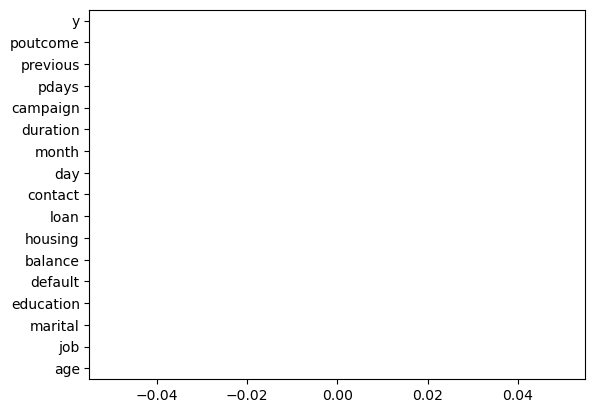

In [12]:
# Checing Missing Information if Any using graphical Method
df.isnull().sum().plot(kind = "barh")
plt.show()

In [13]:
# Checking Output i.e. Target Column for Data Distribution
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [14]:
# Encoding Target Column
# No : 0 and Yes : 1

df['y'] = df['y'].replace({'no':0,'yes':1})

In [15]:
# Encoding default Column
# No : 0 and Yes : 1
df['default'] = df['default'].replace({'no':0,'yes':1})

In [16]:
# Encoding housing Column
# No : 0 and Yes : 1
df['housing'] = df['housing'].replace({'no':0,'yes':1})

In [17]:
# Encoding loan Column
# No : 0 and Yes : 1
df['loan'] = df['loan'].replace({'no':0,'yes':1})

In [18]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [19]:
# Using Lable Encoding Technique
from sklearn.preprocessing import LabelEncoder

df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])

In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [21]:
# Alternative Code 
'''
le = LabelEncoder()
for i in Categorical_Data:
    df[i] = le.fit_transform(df[i])
'''

'\nle = LabelEncoder()\nfor i in Categorical_Data:\n    df[i] = le.fit_transform(df[i])\n'

In [22]:
# Target Column Shows Imbalance Dataset
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [30]:
df.corr()['y']

age          0.025155
job          0.040438
marital      0.045588
education    0.066241
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact     -0.148395
day         -0.028348
month       -0.024471
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome    -0.077840
y            1.000000
Name: y, dtype: float64

Important Question for interview
what is data Leakage and how to prevent data Leakage


In [ ]:
# Balancing The Target Column Using Smote Technique

# Step 1 : Divide Dataset into X and y
# X : Independent Column and y : Target Column 

X = df.drop(columns = 'y')  # Independent Columns: 16

y = df['y']                 # Target Column : 1


# Step 2: Split the Dataset into Train and Test
# 100 % ----> 70 % Data is used for Training [Seen Data] and 30 % Data [UnSeen] is used for Testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state = 7)


# Step 3: Normalization/ Scaling Technique 
# Standard Scaler ---> When Dataset is Normally Distributed
# MinMax Scaler ---->   When Dataset Having Minor outliers
# Robudt Scaler ---->   When Data is Non Normal Distributed and Having lots of Outliers
# for training data we have to use fit_transform
# for test data we have to use .transform

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train
# X_test
# X

# Step 4 : Using Smote Technique to Balance Target Column 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


# Step :- After Balancing the Target Column for Binary Classification Model use Logistic Regression
'''
For Calculation 
TP = True Positive
TN = True Negative
FP = False Positive
FN = False Nagative

Accuracy = (TP+TN) / (TP+TN+FP+FN) ---> For Balanced Data

Precision  = (TP) / (TP+FP) ---> PPV ---> For Minor Unbalanced

Recall =  (TP) / (TP+FP) ---> Sensitivity/TPR

F1 Score = 2 * ((Precision * Recall) / (Precision + Recall))

'''
# Import Model Preprocessing Library from Sklearn
from sklearn.linear_model import LogisticRegression
# Implement Logistic Regression to our Binary Classfication Model
LR = LogisticRegression()
# fit the model on training Dataset
LR.fit(X_train, y_train)

# Predict the value Based on Test Dataset 
y_pred = LR.predict(X_test)

# Step 6 : Use Metrics to evaluate Model Performance
from sklearn.metrics import accuracy_score,classification_report

accuracy_score_LR = accuracy_score(y_test,y_pred)
accuracy_score_LR



0.8124447065762312

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89     12030
           1       0.35      0.80      0.49      1534

    accuracy                           0.81     13564
   macro avg       0.66      0.80      0.69     13564
weighted avg       0.90      0.81      0.84     13564



        Predicted	         Predicted
Actual	True Positive (TP)	 False Negative (FN)
Actual	False Positive (FP)	 True Negative (TN)

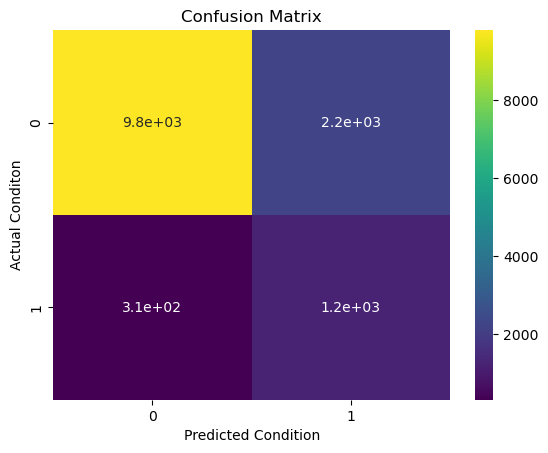

In [25]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Condition")
plt.ylabel("Actual Conditon")
plt.show()

### **Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_predict_RF = RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test,y_predict_RF)

accuracy_score_RF


0.893246829843704

In [27]:
# Classification Report for RandomForest Model

print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12030
           1       0.52      0.63      0.57      1534

    accuracy                           0.89     13564
   macro avg       0.74      0.78      0.76     13564
weighted avg       0.90      0.89      0.90     13564



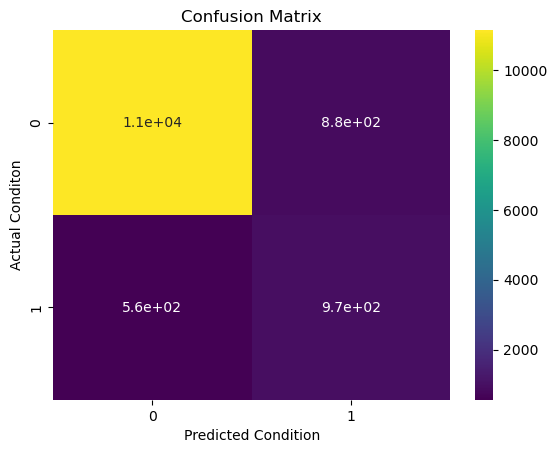

In [28]:
# Confusion Matrix for Random Forest Classification Model

sns.heatmap(confusion_matrix(y_test,y_predict_RF),cmap="viridis",annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Condition")
plt.ylabel("Actual Conditon")
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

accuracy_score_DT = accuracy_score(y_test,y_pred_DT)
accuracy_score_DT

0.8588174579769979